# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#
from citipy import citipy
#import citypy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


'd3738094a1fc5f8a507eea19f4057fa8'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



622

In [4]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []
city_id_list = []


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')



for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
   # print(response)
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    #print(query_url)
    try:
        #city_id = response['weather']['id']
        #city_id_list.append(city_id)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        #humidity_1 = response['main']['humidity']
       # humidity.append(humidity_1)
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        new_cities.append(city)
        
       
    except:
        print("City not found!")
        pass
print(response)
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | albany
Processing record 2 of set 0 | mar del plata
Processing record 3 of set 0 | ushuaia
Processing record 4 of set 0 | ancud
Processing record 5 of set 0 | erdenet
Processing record 6 of set 0 | butaritari
Processing record 7 of set 0 | tailai
Processing record 8 of set 0 | kanigoro
Processing record 9 of set 0 | trincomalee
Processing record 10 of set 0 | aguilas
Processing record 11 of set 0 | new norfolk
Processing record 12 of set 0 | general salgado
Processing record 13 of set 0 | deniliquin
Processing record 14 of set 0 | rikitea
Processing record 15 of set 0 | tasiilaq
Processing record 16 of set 0 | reutte
Processing record 17 of set 0 | ati
Processing record 18 of set 0 | torbay
Processing record 19 of set 0 | tanout
Processing record 20 of set 0 | palmer
Processing record 21 of set 0 | mahebourg
Processing record 22 of set 0 | hobart
Processing record 23 of set 0 | bas

Processing record 39 of set 3 | severo-yeniseyskiy
Processing record 40 of set 3 | bose
Processing record 41 of set 3 | baghdad
Processing record 42 of set 3 | panguna
Processing record 43 of set 3 | newark
Processing record 44 of set 3 | severo-kurilsk
Processing record 45 of set 3 | paamiut
Processing record 46 of set 3 | longyearbyen
Processing record 47 of set 3 | teya
Processing record 48 of set 3 | alta floresta
Processing record 49 of set 3 | karratha
Processing record 50 of set 3 | taoudenni
Processing record 0 of set 4 | isangel
Processing record 1 of set 4 | mandurah
Processing record 2 of set 4 | solnechnyy
Processing record 3 of set 4 | nerchinskiy zavod
Processing record 4 of set 4 | codrington
Processing record 5 of set 4 | coihaique
Processing record 6 of set 4 | rodrigues alves
Processing record 7 of set 4 | auray
Processing record 8 of set 4 | soyo
Processing record 9 of set 4 | sapele
Processing record 10 of set 4 | nabire
Processing record 11 of set 4 | antofagasta
P

Processing record 32 of set 7 | zelenets
Processing record 33 of set 7 | shibarghan
City not found!
Processing record 34 of set 7 | porto novo
Processing record 35 of set 7 | watertown
Processing record 36 of set 7 | jaicos
Processing record 37 of set 7 | taltal
Processing record 38 of set 7 | saint george
Processing record 39 of set 7 | warqla
City not found!
Processing record 40 of set 7 | brzeg dolny
Processing record 41 of set 7 | malanville
Processing record 42 of set 7 | pilar
Processing record 43 of set 7 | haibowan
City not found!
Processing record 44 of set 7 | lighthouse point
Processing record 45 of set 7 | viransehir
Processing record 46 of set 7 | aragarcas
Processing record 47 of set 7 | xichang
Processing record 48 of set 7 | bocas del toro
Processing record 49 of set 7 | kuybyshevo
Processing record 50 of set 7 | caluquembe
Processing record 0 of set 8 | kaoma
Processing record 1 of set 8 | qui nhon
Processing record 2 of set 8 | siderno
Processing record 3 of set 8 | b

Processing record 21 of set 11 | stephenville
Processing record 22 of set 11 | breclav
Processing record 23 of set 11 | tsiroanomandidy
Processing record 24 of set 11 | algiers
Processing record 25 of set 11 | shaoguan
Processing record 26 of set 11 | atambua
Processing record 27 of set 11 | luganville
Processing record 28 of set 11 | pafos
Processing record 29 of set 11 | athabasca
Processing record 30 of set 11 | xining
Processing record 31 of set 11 | vanavara
Processing record 32 of set 11 | gunjur
Processing record 33 of set 11 | iqaluit
Processing record 34 of set 11 | romitan
Processing record 35 of set 11 | nyurba
Processing record 36 of set 11 | bathsheba
Processing record 37 of set 11 | arauca
Processing record 38 of set 11 | tumannyy
City not found!
Processing record 39 of set 11 | sur
Processing record 40 of set 11 | atar
Processing record 41 of set 11 | kamenskoye
City not found!
Processing record 42 of set 11 | timizart
Processing record 43 of set 11 | cayenne
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": max_temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind_speed
}
weather_data = pd.DataFrame(weather_data_dict)
len(weather_data)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,albany,7,US,1619895323,31,55.99,42.6001,-73.9662,8.01
1,mar del plata,0,AR,1619895278,49,72.00,-38.0023,-57.5575,14.97
2,ushuaia,20,AR,1619895544,65,44.60,-54.8000,-68.3000,4.61
3,ancud,75,CL,1619895545,82,60.01,-41.8697,-73.8203,12.66
4,erdenet,33,MN,1619895545,81,38.77,49.0333,104.0833,4.70


In [7]:
#cities_list = zip(new_cities,cloudiness,country,date,humidity,max_temp,lat,lng)
output_file = os.path.join('..', 'output_data', 'cities.csv')
#weather_data.to_csv("output/cities.csv", index=False, header=True)
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
for index, row in weather_data.iterrows():
    # print(weather_data.loc[index, 'Humidity'])
     if  (weather_data.loc[index, 'Humidity']) > 100:
         #print("100")
         #print(weather_data.loc[index][row])
         print(f"Retrieving Results for Index: {index}.")
   #  else:
    #    print(weather_data.loc[index, 'Humidity'])
        

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data.replace("", np.nan, inplace = False)
weather_data = weather_data.dropna()
weather_data.head()
print(f"There are {len(weather_data)} cities included in the weather analyses.")

There are 580 cities included in the weather analyses.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

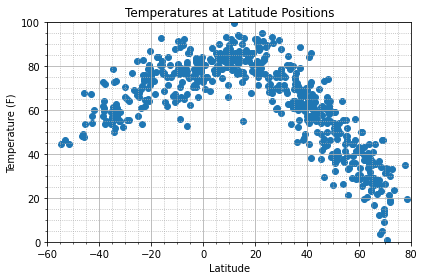

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = weather_data["Lat"]
y_values = weather_data["Temp"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/LatvsTemp.png")

This plot is looking at the relationship between latitude and temperature. Temp is getting hotter as we approach the equator.

## Latitude vs. Humidity Plot

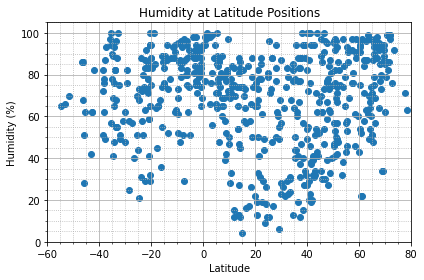

<Figure size 432x288 with 0 Axes>

In [11]:
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/lat_humid.png")

This plot is looking at the relationship between latitude and humidity. No correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

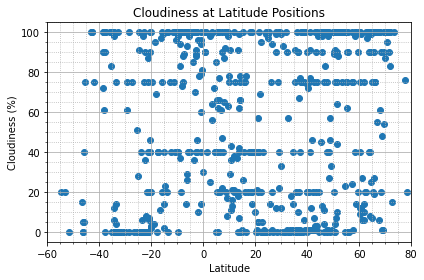

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/lat_clouds.png")

This plot is looking at the relationship between latitude and cloudiness. 
This also shows that there does not seem to be much of a correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

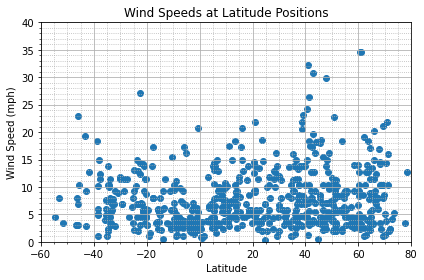

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/lat_wind.png")

This plot is looking at the relationship between latitude and wind speed. It shows that wind speeds are generally greater the farther away from the equator (latitude 0) you get.

## Linear Regression

In [14]:
northern = weather_data.loc[weather_data["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [31]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
  
    plt.savefig(f"../Images/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8816491838890708


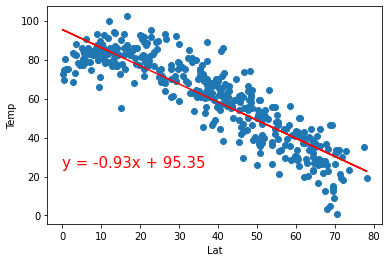

In [32]:
xlbl = "Lat"
ylbl = "Temp"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7159693369641353


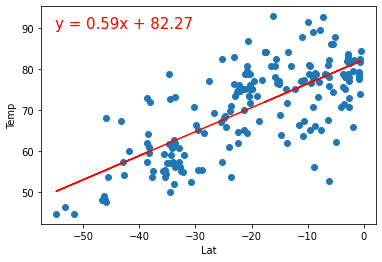

In [33]:
xlbl = "Lat"
ylbl = "Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

Both the Northern and Southern Hemispheres show the same inverse relationship between latitude and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14473854138186257


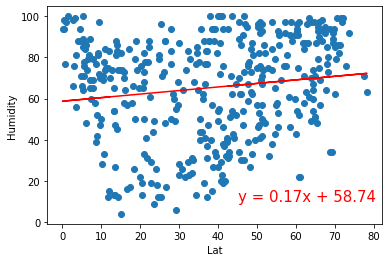

In [34]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26429692152626655


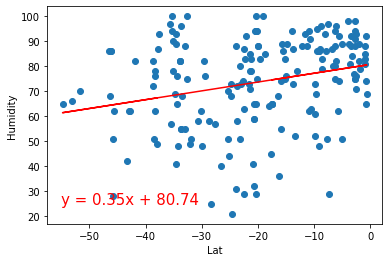

In [35]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

There does not seem to be a very strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14441698309707166


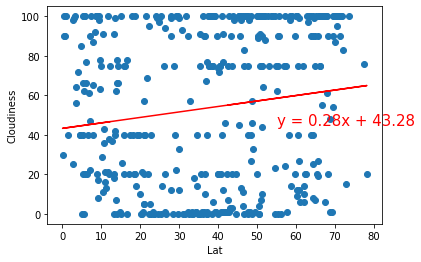

In [36]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (55,45)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2844083066472199


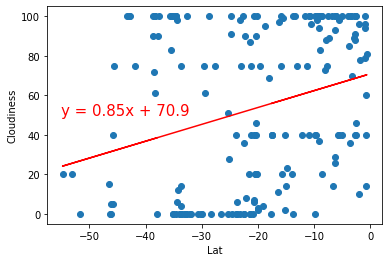

In [37]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

Not much correlation between Cloudiness and Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08541745046504068


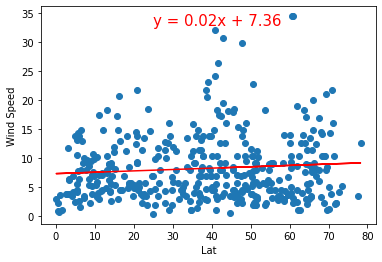

In [38]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (25,33)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23870790953241142


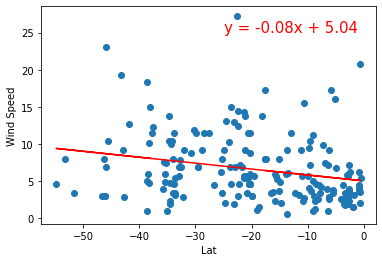

In [39]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)